<center><img src="Fig/UGA.png" width="30%" height="30%"></center>
<center><h3>Master of Science in Industrial and Applied Mathematics (MSIAM)  - 1st year</h3></center>
<hr>
<center><h1>Numerical Optimization</h1></center>
<center><h2>Lab on Variance-Reduced Stochastic Gradient</h2></center>

---

The following script will allow you to import *notebooks* as if you imported *python files* and will have to be executed at each time you launch Jupyter notebooks.

In [1]:
import start
from imp import reload

---

# Recall of the proximal gradient algorithm



In [2]:
import algoProx             # load our algoProx module (from notebook)
reload(algoProx)            # reload the module if changed (and saved)
from algoProx import *      # import all methods of the module into the current environment

import numpy as np
import logistic_regression_student as pb
reload(pb)

#### Parameter we give at our algorithm (see algoGradient.ipynb)
PREC    = 1e-5                     # Sought precision
ITE_MAX = 1000                      # Max number of iterations
x0      = np.zeros(pb.n)              # Initial point
step    = 1.0/pb.L

##### gradient algorithm
x,x_tab = proximal_gradient_algorithm(pb.F , pb.f_grad , pb.g_prox , x0 , step , PREC, ITE_MAX , True)



importing notebook from algoProx.ipynb
importing notebook from algoProx.ipynb
importing notebook from logistic_regression_student.ipynb
importing notebook from logistic_regression_student.ipynb
------------------------------------
 Proximal gradient algorithm
------------------------------------
START    -- stepsize = 0.030334772813507393
FINISHED -- 999 iterations / 2.618698s -- final value: 0.438712




## Decrease of the algorithm.

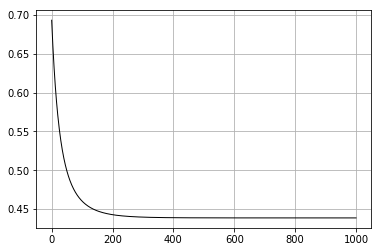

In [3]:
import matplotlib.pyplot as plt
% matplotlib inline

F = []
for i in range(x_tab.shape[0]):
    F.append( pb.F(x_tab[i])) 

plt.figure()
plt.plot( F, color="black", linewidth=1.0, linestyle="-")
plt.grid(True)
plt.show()

### Support of the vector $x_k$ 


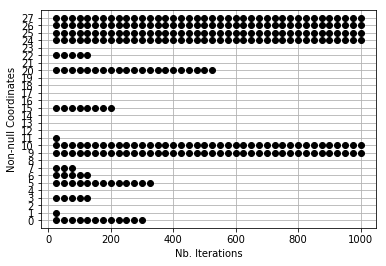

In [4]:
plt.figure()

for i in np.arange(0,x_tab.shape[0],int(x_tab.shape[0]/40)):
    for j in range(pb.n):
        if np.abs(x_tab[i,j])>1e-14:
            plt.plot( i , j  , 'ko')

plt.grid(True)
plt.ylabel('Non-null Coordinates')
plt.xlabel('Nb. Iterations')
plt.ylim(-1,pb.d+1)
plt.yticks(np.arange(0,pb.d+1))
plt.show()

---

# Stochastic gradient 


In the following, instead of considering $f$ as a whole, we will use its structure 
$$ f(x) := \frac{1}{m}\sum_{i=1}^m f_i(x)$$

> Implement the gradient related to $f_i$, related to one example, in ``[logistic_regression_student]``

With this structure a popular minimization algorithm is the *stochastic gradient algorithm* which writes as follows:
* Select uniformly $i$ in $1,..,m$
* $x_{k+1} = \mathbf{prox}_{\gamma g}\left( x_k - \gamma_k \nabla f_i(x_k) \right) $

> Implement this algorithm with a stepsize vanishing as $1/k$

------------------------------------
 Stochastic gradient algorithm
------------------------------------
START    -- stepsize = 0.030334772813507393
FINISHED -- 999 iterations / 0.057937s -- final value: 0.458109




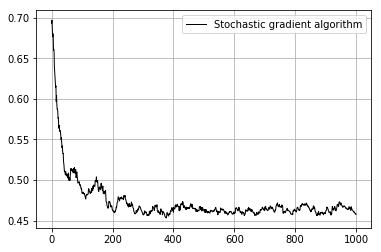

In [29]:
import random

def stochastic_gradient_algorithm(F , m, f_grad_ex , g_prox , x0 ,step, PREC , ITE_MAX , PRINT ):
    x = np.copy(x0)
    x_tab = np.copy(x)
    if PRINT:
        print("------------------------------------\n Stochastic gradient algorithm\n------------------------------------\nSTART    -- stepsize = {:0}".format(step))
    t_s =  timeit.default_timer()
    for k in range(ITE_MAX):
        i = random.randint(0,m-1)
        #print(i)
        g = f_grad_ex(x,i)
        x = g_prox(x - step*g , step)  #######  ITERATION
        x_tab = np.vstack((x_tab,x))


    t_e =  timeit.default_timer()
    if PRINT:
        print("FINISHED -- {:d} iterations / {:.6f}s -- final value: {:f}\n\n".format(k,t_e-t_s,F(x)))
    return x,x_tab



#### Parameter we give at our algorithm (see algoGradient.ipynb)
PREC    = 1e-5                     # Sought precision
ITE_MAX = 1000                      # Max number of iterations
x0      = np.zeros(pb.n)              # Initial point
step    = 1.0/pb.L

##### gradient algorithm
random.seed(0)
x,x_tab = stochastic_gradient_algorithm(pb.F ,pb.m, pb.f_grad_ex , pb.g_prox , x0, step, PREC, ITE_MAX , True)


F2 = []
for i in range(x_tab.shape[0]):
    F2.append( pb.F(x_tab[i])) 

plt.figure()
plt.plot( F2, color="black", linewidth=1.0, linestyle="-", label="Stochastic gradient algorithm")
plt.grid(True)
plt.legend()
plt.show()

### Variance reduction

The poor performance of this algorithm is notably due to the variance of the gradients. In order to overcome it, *variance reduced* algorithms have been proposed.

We will consider here the popular **SAGA** algorithm  (SAGA: A fast incremental gradient method with support for non-strongly convex composite objectives
A Defazio, F Bach, S Lacoste-Julien, NIPS 2014. ) 

> Implement SAGA from the paper ( http://papers.nips.cc/paper/5258-saga-a-fast-incremental-gradient-method-with-support-for-non-strongly-convex-composite-objectives ) and compare with the stochastic gradient algorithm.


------------------------------------
 SAGA algorithm
------------------------------------
START    -- stepsize = 0.030334772813507393
FINISHED -- 999 iterations / 0.057978s -- final value: 0.480275




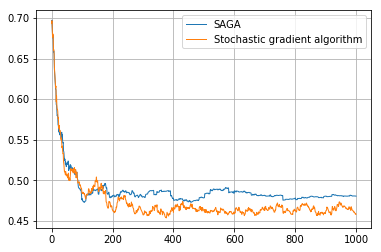

In [36]:
def SAGA(F , m, f_grad_ex, p0, x0 ,step, PREC , ITE_MAX , PRINT ):
    x = np.copy(x0)
    x_tab = np.copy(x)
    p = np.copy(p0)
    if PRINT:
        print("------------------------------------\n SAGA algorithm\n------------------------------------\nSTART    -- stepsize = {:0}".format(step))
    t_s =  timeit.default_timer()
    for k in range(ITE_MAX):
        i = random.randint(0,m-1)
        #print(i)
        grad_i = f_grad_ex(x,i)
        g = grad_i - p[i] + np.sum(p,axis=0)/m
        p[i] = grad_i
        x = x - step*g  #######  ITERATION
        x_tab = np.vstack((x_tab,x))

    t_e =  timeit.default_timer()
    if PRINT:
        print("FINISHED -- {:d} iterations / {:.6f}s -- final value: {:f}\n\n".format(k,t_e-t_s,F(x)))
    return x,x_tab


#### Parameter we give at our algorithm (see algoGradient.ipynb)
PREC    = 1e-5                     # Sought precision
ITE_MAX = 1000                      # Max number of iterations
x0      = np.zeros(pb.n)              # Initial point
step    = 1.0/pb.L
p0 = np.zeros((pb.m,pb.n))

##### gradient algorithm
random.seed(0)
x,x_tab = SAGA(pb.F ,pb.m, pb.f_grad_ex , p0 , x0, step, PREC, ITE_MAX , True)


F3 = []
for i in range(x_tab.shape[0]):
    F3.append( pb.F(x_tab[i])) 

plt.figure()
plt.plot( F3, linewidth=1.0, linestyle="-", label = "SAGA")
plt.plot( F2, linewidth=1.0, linestyle="-", label = "Stochastic gradient algorithm")
plt.grid(True)
plt.legend()
plt.show()


array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.])